### Task

1. Прочитать с помощью Pandas две таблицы
 - commits.csv
 - issues.csv 
2. Объединить таблицы по полю Key.
3. Выбрать столбцы:
 - 'author_name' – имя автора коммита;
 - 'author_email' – почта автора коммита;
 - 'committer_name' – имя исполнителя;
 - 'committer_email' – почта исполнителя;
 - 'time' – время коммита;
 - 'time_offset' – отклонение во времени;
 - 'message_encoding' – текст коммита. 
как независимые переменные, и столбец
 - ‘severity’ – степень ошибки как зависимую переменную для предсказания.
4. Провести статистический анализ данных (exploratory data analysis), используя произвольные тип визуализации, в частности, сколько коммитов в день делает пользователь и т.д.
5. Заполнить пропущенные значения в столбцах.
6. Превратить категорийные текстовые переменные в числовые.
7. Превратить некатегорийные текстовые переменные в векторы любым оптимальным способом. В случае необходимости, Вы можете дополнять dataset дополнительными переменными.
8. Разделить dataset на train и test части.
9. Построить модель, которая будет предсказывать переменную severity для тестового dataset на основании данных в train dataset.
10. Протестировать несколько моделей и выбрать из них лучшую. А именно:
- использовать Sklearn библиотеку (модели: Random Forest, Decision trees, Naive Bayes, SVM, etc.)
- использование нейронных сетей будет плюсом. Можна взять Keras.io и натренировать нейронную сеть (выбрать Fully Connected Layer или другую архитектуру).
11. Оптимизировать модели с использованием cross validation, grid search, etc.
12. Оценить эффективность моделей на test datataset с использованием нескольких метрик на Ваше усмотрение и указать наиболее эффективную модель.
13. Визуализировать confusion matrix для сравнения результатов.
14. Кратко описать полученные результаты и их сравнение на английском языке. Выразить свое мнение, почему некоторые модели работают лучше или хуже.

### Load

In [1]:
import pandas as pd, numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
!ls data/

commits.zip  issues.zip


In [2]:
commits = pd.read_csv('data/commits.zip')
issues = pd.read_csv('data/issues.zip')

In [3]:
df = commits.merge(issues, on='key')

In [4]:
peak = df[['author_name','author_email','committer_name','committer_email', 'time', 'time_offset', 'message_encoding','severity']].copy()

In [5]:
print ('Issue shape', issues.shape)
print ('Commits shape', commits.shape)

print ('Merged shape', df.shape)
print ('Peaked shape', peak.shape)

Issue shape (17966, 16)
Commits shape (19226, 10)
Merged shape (11475, 25)
Peaked shape (11475, 8)


### EDA

#### Fast overview over all data
Observe nans

In [6]:
commits.replace('None', np.nan, inplace=True)
commits.isnull().sum()

key                 7750
cid                    0
author_name            0
author_email           0
committer_name         0
committer_email        0
time                   0
time_offset            0
tree_id                0
message_encoding       0
dtype: int64

In [7]:
commits[commits.isnull()['key']].head()

,key,cid,author_name,author_email,committer_name,committer_email,time,time_offset,tree_id,message_encoding
8,NaN,15d392688456ad9f963417843c52a7b610f771d2,hyukjinkwon,gurwls223@gmail.com,Felix Cheung,felixcheung@apache.org,1478407653,-420,4a969525408e41c1bc971c9b79ab20ad741a3962,[MINOR][DOCUMENTATION] Fix some minor descript...
23,NaN,14f235d5643bca75e270652c15154d86e57a7a70,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478248026,-420,8b058a154a68bdd9c8d178730ba18aec68b10fd2,Closing some stale/invalid pull requests\n\nCl...
29,NaN,e89202523bc2f5573bd736278c6b96c6e6759909,wm624@hotmail.com,wm624@hotmail.com,Felix Cheung,felixcheung@apache.org,1478212038,-420,a3684731d25172d2f65001dc2018ca9d910fbee9,[SPARKR][TEST] remove unnecessary suppressWarn...
39,NaN,0ea5d5b24c1f7b29efeac0e72d271aba279523f7,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478166354,-420,4988c9ae3ce68ee6bfe8eb22627ce91fae48dcd4,[SQL] minor - internal doc improvement for Ins...
57,NaN,bcbe44440e6c871e217f06d2a4696fd41f1d2606,Maria Rydzy,majrydzy+gh@gmail.com,Sean Owen,sowen@cloudera.com,1478077756,0,9cc8b36446b564f704b2bd8f634420a2f7ed2098,[MINOR] Use <= for clarity in Pi examples' Mon...


In [8]:
issues.replace('None', np.nan, inplace=True)
issues.isnull().sum()

key                    0
jira_id                0
status_category        0
creator             1060
priority             282
status                 0
assignee            7042
issuetype              0
reporter               5
resolution         17966
project                0
updated                0
created                0
resolved            2546
components          1332
severity               0
dtype: int64

In [9]:
issues[issues.isnull()['creator']].head()

,key,jira_id,status_category,creator,priority,status,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
2700,SPARK-1056,12704624,Complete,NaN,Trivial,Resolved,sandyr,Bug,sandy,NaN,Spark,2014-04-04T20:51:01.000+0000,2014-02-06T15:02:39.000+0000,2014-02-18T13:42:09.000+0000,YARN,0
2701,SPARK-1055,12704547,Complete,NaN,Major,Resolved,CodingCat,Bug,maasg,NaN,Spark,2014-02-22T16:59:56.000+0000,2014-02-05T03:12:36.000+0000,2014-02-22T16:35:14.000+0000,Examples,3
2702,SPARK-1054,12704650,Complete,NaN,Major,Resolved,NaN,New Feature,rohitbrai,NaN,Spark,2015-03-01T11:53:23.000+0000,2014-02-05T00:31:02.000+0000,2015-03-01T11:53:23.000+0000,Spark Core,3
2703,SPARK-1053,12704543,Complete,NaN,Major,Resolved,sandyr,Sub-task,sandy,NaN,Spark,2014-04-04T20:49:15.000+0000,2014-02-04T23:22:31.000+0000,2014-02-27T01:19:19.000+0000,YARN,3
2704,SPARK-1052,12704604,Complete,NaN,Major,Resolved,bijaybisht,Bug,amiorin,NaN,Spark,2014-02-16T16:55:31.000+0000,2014-02-04T13:48:02.000+0000,2014-02-16T16:55:31.000+0000,NaN,3


In [10]:
issues[issues.isnull()['priority']].head()

,key,jira_id,status_category,creator,priority,status,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
6700,SPARK-555,12705306,Complete,NaN,NaN,Resolved,joshrosen,New Feature,matei,NaN,Spark,2013-12-07T12:56:44.000+0000,0011-11-23T18:06:00.000+0000,2013-12-07T12:56:44.000+0000,NaN,0
6701,SPARK-554,12705301,Complete,NaN,NaN,Resolved,sandyr,New Feature,matei,NaN,Spark,2014-06-12T15:15:34.000+0000,0011-11-30T11:40:00.000+0000,2014-06-12T15:15:34.000+0000,NaN,0
6702,SPARK-553,12705329,Complete,NaN,NaN,Resolved,NaN,New Feature,matei,NaN,Spark,2013-05-05T11:40:42.000+0000,0011-12-02T21:34:00.000+0000,2013-05-05T11:40:30.000+0000,Documentation,0
6703,SPARK-552,12705288,Complete,NaN,NaN,Closed,NaN,New Feature,shawny,NaN,Spark,2012-10-20T16:57:18.000+0000,0011-12-19T20:26:00.000+0000,2012-10-20T16:57:18.000+0000,NaN,0
6704,SPARK-551,12705298,Complete,NaN,NaN,Resolved,NaN,Bug,dukeecnu,NaN,Spark,2013-12-07T14:12:13.000+0000,0011-12-26T00:37:00.000+0000,2013-12-07T14:12:13.000+0000,NaN,0


In [11]:
issues[issues.isnull()['reporter']].head()

,key,jira_id,status_category,creator,priority,status,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
7231,SPARK-624,12705348,Complete,NaN,Minor,Resolved,NaN,Improvement,NaN,NaN,Spark,2012-11-21T11:38:19.000+0000,2012-11-15T13:40:45.000+0000,2012-11-21T11:38:19.000+0000,NaN,1
7251,SPARK-604,12705292,Complete,NaN,Major,Resolved,NaN,Bug,NaN,NaN,Spark,2015-05-15T13:50:33.000+0000,2012-11-01T16:55:24.000+0000,2015-05-15T13:50:33.000+0000,Mesos,3
7254,SPARK-601,12704935,Complete,NaN,Minor,Resolved,markhamstra,Bug,NaN,NaN,Spark,2013-08-06T23:20:00.000+0000,2012-10-31T16:02:31.000+0000,2013-08-06T23:20:00.000+0000,Spark Core,1
7271,SPARK-584,12704937,Complete,NaN,Minor,Resolved,NaN,Improvement,NaN,NaN,Spark,2016-01-05T21:13:57.000+0000,2012-10-22T14:39:08.000+0000,2016-01-05T21:13:56.000+0000,Spark Core,1
7276,SPARK-579,12704844,Complete,NaN,Major,Resolved,patrick,Bug,NaN,NaN,Spark,2012-10-19T21:28:41.000+0000,2012-10-19T21:28:15.000+0000,2012-10-19T21:28:41.000+0000,NaN,3


In [12]:
issues[issues.isnull()['resolution']].head()

,key,jira_id,status_category,creator,priority,status,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
0,SPARK-4957,12763687,Complete,nathan_gs,Major,Closed,NaN,Improvement,nathan_gs,NaN,Spark,2016-09-06T01:43:57.000+0000,2014-12-24T13:38:57.000+0000,2016-09-06T01:43:56.000+0000,Scheduler,3
1,SPARK-4956,12763679,Complete,liaoyuxi,Minor,Closed,NaN,Bug,liaoyuxi,NaN,Spark,2015-03-04T05:16:07.000+0000,2014-12-24T12:27:12.000+0000,2015-02-23T22:34:41.000+0000,MLlib,1
2,SPARK-4955,12763661,Complete,chengxiang li,Blocker,Closed,lianhuiwang,Bug,chengxiang li,NaN,Spark,2015-01-28T20:54:23.000+0000,2014-12-24T09:16:23.000+0000,2015-01-28T20:54:23.000+0000,YARN,10
3,SPARK-4954,12763657,Complete,liyezhang556520,Minor,Resolved,liyezhang556520,Improvement,liyezhang556520,NaN,Spark,2014-12-27T07:25:26.000+0000,2014-12-24T09:01:34.000+0000,2014-12-27T07:25:26.000+0000,Spark Core,1
4,SPARK-4953,12763643,Complete,sarutak,Major,Resolved,sarutak,Bug,sarutak,NaN,Spark,2014-12-25T15:06:12.000+0000,2014-12-24T07:07:56.000+0000,2014-12-25T15:06:12.000+0000,Documentation,3


In [13]:
issues[issues.isnull()['resolved']].head()

,key,jira_id,status_category,creator,priority,status,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
17,SPARK-4940,12763522,New,tnachen,Major,Open,NaN,Improvement,tnachen,NaN,Spark,2016-09-01T17:46:18.000+0000,2014-12-23T19:01:54.000+0000,NaN,Mesos,3
46,SPARK-4911,12763082,New,sandyr,Major,Open,NaN,New Feature,sandyr,NaN,Spark,2015-03-09T21:02:51.000+0000,2014-12-20T17:55:25.000+0000,NaN,Spark Core,3
51,SPARK-4906,12762931,New,mkim,Major,Open,NaN,Bug,mkim,NaN,Spark,2016-06-26T14:49:08.000+0000,2014-12-19T18:44:52.000+0000,NaN,Web UI,3
58,SPARK-4899,12762799,New,aash,Major,Open,NaN,New Feature,aash,NaN,Spark,2015-05-19T13:37:31.000+0000,2014-12-19T08:44:03.000+0000,NaN,Mesos,3
71,SPARK-4886,12762611,New,zhengxudong,Major,Open,NaN,Improvement,zhengxudong,NaN,Spark,2015-07-23T09:24:41.000+0000,2014-12-18T15:51:37.000+0000,NaN,SQL,3


In [14]:
issues[issues.isnull()['components']].head()

,key,jira_id,status_category,creator,priority,status,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
21,SPARK-4936,12763452,Complete,search4mahesh,Minor,Closed,NaN,Improvement,search4mahesh,NaN,Spark,2014-12-24T05:43:26.000+0000,2014-12-23T11:59:39.000+0000,2014-12-24T05:43:12.000+0000,NaN,1
31,SPARK-4926,12763357,Complete,Lily,Major,Resolved,NaN,Question,Lily,NaN,Spark,2014-12-25T15:12:28.000+0000,2014-12-23T02:06:35.000+0000,2014-12-25T15:12:28.000+0000,NaN,3
44,SPARK-4913,12763129,Complete,viirya,Major,Resolved,viirya,Bug,viirya,NaN,Spark,2014-12-23T22:59:46.000+0000,2014-12-21T16:14:44.000+0000,2014-12-23T22:59:35.000+0000,NaN,3
47,SPARK-4910,12763071,Complete,xhudik,Minor,Resolved,srowen,Bug,xhudik,NaN,Spark,2014-12-21T21:20:33.000+0000,2014-12-20T14:08:27.000+0000,2014-12-21T21:20:33.000+0000,NaN,1
62,SPARK-4895,12762759,Complete,zanehu,Major,Resolved,NaN,New Feature,zanehu,NaN,Spark,2015-02-08T13:17:36.000+0000,2014-12-19T04:09:41.000+0000,2015-02-08T13:17:36.000+0000,NaN,3


#### Nans overview
Same but deeply

In [15]:
issues.isnull().sum(axis=1).sort_values(ascending = False).head()

17580    5
17764    5
6795     5
6796     5
6797     5
dtype: int64

In [16]:
issues.loc[17580]

key                                   SPARK-375
jira_id                                12705226
status_category                        Complete
creator                                     NaN
priority                                    NaN
status                                 Resolved
assignee                                    NaN
issuetype                                   Bug
reporter                                   rxin
resolution                                  NaN
project                                   Spark
updated            2012-10-19T22:50:36.000+0000
created            0012-08-27T21:35:00.000+0000
resolved           2012-10-19T22:50:36.000+0000
components                                  NaN
severity                                      0
Name: 17580, dtype: object

In [17]:
df.replace('None', np.nan, inplace=True)

In [18]:
df.isnull().sum()

key                     0
cid                     0
author_name             0
author_email            0
committer_name          0
committer_email         0
time                    0
time_offset             0
tree_id                 0
message_encoding        0
jira_id                 0
status_category         0
creator               505
priority               14
status                  0
assignee              615
issuetype               0
reporter                2
resolution          11475
project                 0
updated                 0
created                 0
resolved              118
components            549
severity                0
dtype: int64

In [19]:
peak.replace('None', np.nan, inplace=True)

In [20]:
peak.isnull().sum()

author_name         0
author_email        0
committer_name      0
committer_email     0
time                0
time_offset         0
message_encoding    0
severity            0
dtype: int64

#### Fast statistics
describe()

In [21]:
peak.describe().T

,count,mean,std,min,25%,50%,75%,max
time,11475.0,1.438432e+09,2.351386e+07,1.350714e+09,1.422581e+09,1.438761e+09,1.458332e+09,1.478510e+09
time_offset,11475.0,-3.495582e+02,2.278502e+02,-6.000000e+02,-4.200000e+02,-4.200000e+02,-4.200000e+02,5.400000e+02
severity,11475.0,3.129586e+00,2.392655e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,1.000000e+01


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,11475.0,1.438432e+09,2.351386e+07,1.350714e+09,1.422581e+09,1.438761e+09,1.458332e+09,1.478510e+09
time_offset,11475.0,-3.495582e+02,2.278502e+02,-6.000000e+02,-4.200000e+02,-4.200000e+02,-4.200000e+02,5.400000e+02
jira_id,11475.0,1.285133e+07,9.623483e+04,1.270443e+07,1.275909e+07,1.284466e+07,1.294092e+07,1.301873e+07
resolution,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
severity,11475.0,3.129586e+00,2.392655e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,1.000000e+01


In [23]:
issues.describe().T

,count,mean,std,min,25%,50%,75%,max
jira_id,17966.0,1.285459e+07,99177.539902,12704427.0,12760031.5,12848646.0,12948633.0,13018756.0
resolution,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
severity,17966.0,2.853891e+00,2.091339,0.0,1.0,3.0,3.0,10.0


In [24]:
commits.describe().T

,count,mean,std,min,25%,50%,75%,max
time,19226.0,1.413722e+09,4.242159e+07,1.269905e+09,1.383373e+09,1.421787e+09,1.447799e+09,1.478510e+09
time_offset,19226.0,-3.476417e+02,2.344729e+02,-6.000000e+02,-4.800000e+02,-4.200000e+02,-4.200000e+02,5.400000e+02


#### Time enc
From unix to human time

In [25]:
import datetime

In [26]:
peak['time'] = peak['time'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%dT%H:%M:%S'))

#### Plot number of unique values

In [27]:
def plot_nunique(df):
    ''' 
    Plot hist number of unique elements for each column
    '''
    nunique = df.nunique(dropna=False)
    plt.figure(figsize=(10,6))
    _ = plt.hist(nunique.astype(float)/df.shape[0], bins=50)
    plt.show()

Peaked columns


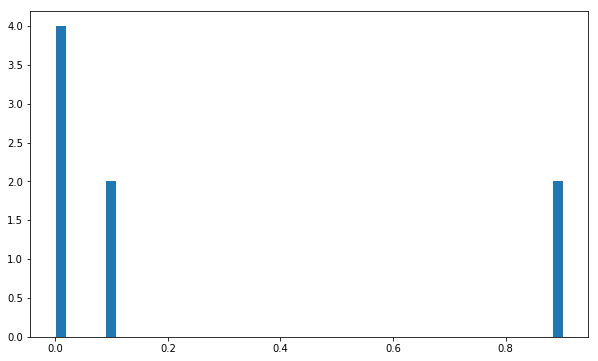

Merged on key


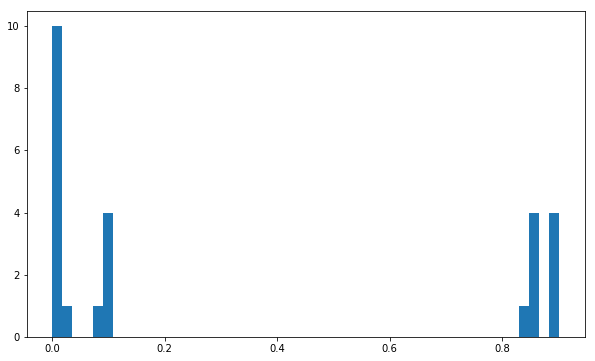

In [28]:
print('Peaked columns')
plot_nunique(peak)
print('Merged on key')
plot_nunique(df)

#### Plot duplicates count

In [29]:
def plot_duplicates(df):
    ''' 
    Plot hist number of duplicated elements for each column
    '''
    result = {col:df.duplicated([col]).sum() for col in df.columns}
    plt.figure(figsize=(6,8))
    plt.barh(list(result.keys()), list(result.values()), color='g', alpha=0.5)
    plt.show()

Peaked columns


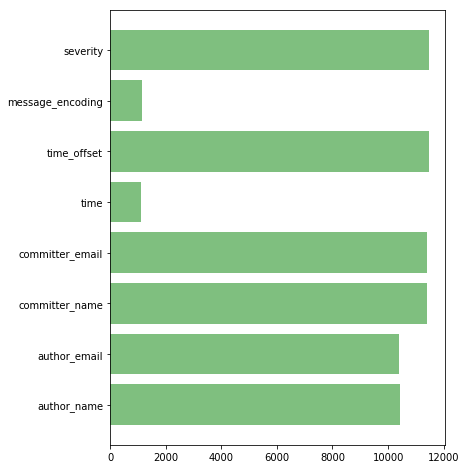

Merged on key


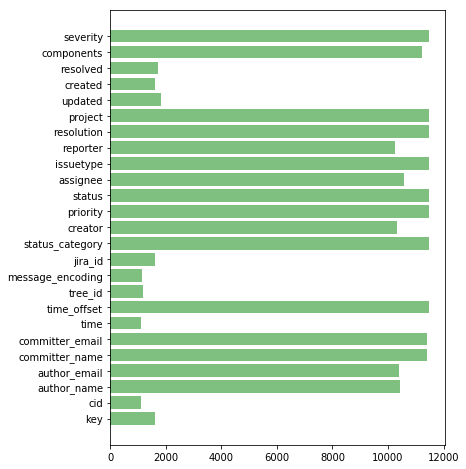

In [30]:
print('Peaked columns')
plot_duplicates(peak)
print('Merged on key')
plot_duplicates(df)

#### Value counts

In [31]:
def hist(data, name, col, count, dir_name, show):
    '''
    data - value counts Series
    name - additional name for your plot
    count - the shape of value counts
    dir_name - additional directory for plot
    show - plot show or not
    '''
    plt.close()
    plt.figure(figsize=(6,8))
    plt.barh(data.index, data.values, color='g', alpha=0.6)
    plt.xlabel('Count')
    plt.ylabel('Top 15 values of ' + str(count))
    plt.title(col)
    
    if dir_name != None:
        if dir_name not in os.listdir('plot'):
            os.mkdir('plot/' + dir_name+'/')
        plt.savefig('plot/' + dir_name+ '/' + name + "_test_" + col + ".png")
    else:
        plt.savefig('plot/' + name + "_test_" + col + ".png")

    if show == True:
        plt.show()
    else:
        plt.ioff()
        plt.close()

def val_count(df, m_plot = False, name = 'Test', dir_name = None, show = True):
    ''' 
    
    Vizualize count of top 15 values in each column of the inputed DataFrame.
    
    m_plot: bool([True, False]), show pd.Series value count for each column. Saving each plot;
    name: str(), additional name for plot (if m_plot = True);
    dir_name: str(), default(None), additional directory for your plots;
    show: bool([True, False]), show your plot in notebook
    
    '''
    
    for col in df.columns:
        if col != 'message_encoding':
            if m_plot == False:
                print (df[col].value_counts().head(15))
                print ('Column val_count ' + str(col) + ' shape: ' + str(df[col].value_counts().shape))
            else:
                hist(df[col].value_counts().head(15), name, col, df[col].value_counts().shape[0], dir_name, show)
                plt.close()

In [32]:
val_count(df)

SPARK-12692    11
SPARK-1097     11
SPARK-3873     10
SPARK-1758      9
SPARK-6428      8
SPARK-7927      7
SPARK-1812      6
SPARK-18167     6
SPARK-4397      6
SPARK-6602      6
SPARK-2871      6
SPARK-6765      6
SPARK-635       5
SPARK-12719     5
SPARK-7654      5
Name: key, dtype: int64
Column val_count key shape: (9857,)
dff015533dd7b01b5e392f1ac5f3837e0a65f3f4    13
337c16d57e40cb4967bf85269baae14745f161db    13
0b0b9ceaf73de472198c9804fb7ae61fa2a2e097    12
83b682beec884da76708769414108f4316e620f2    11
287bea13050b8eedc3b8b6b3491f1b5e5bc24d7a     9
3a8b68b7353fea50245686903b308fa9eb52cb51     9
4ffc27caaf46ffac56c3c0b3e928f1aff227a184     6
1abf7dc16ca1ba1777fe874c8b81fe6f2b0a6de5     6
c032b0bf92130dc4facb003f0deaeb1228aefded     6
1df05a40ebf3493b0aff46d18c0f30d2d5256c7b     6
4f60651cbec1b4c9cc2e6d832ace77e89a233f3a     5
c03299a18b4e076cabb4b7833a1e7632c5c0dabe     5
f35b0c3436898f22860d2c6c1d12f3a661005201     5
ac96d9657c9a9f89a455a1b671c059d896012d41     5
72981bc8f0d4

In [33]:
df[df['cid'] == 'dff015533dd7b01b5e392f1ac5f3837e0a65f3f4'].head().T

,9389,9426,9476,9480,9481
key,SPARK-3886,SPARK-3796,SPARK-2805,SPARK-3002,SPARK-2924
cid,dff015533dd7b01b5e392f1ac5f3837e0a65f3f4,dff015533dd7b01b5e392f1ac5f3837e0a65f3f4,dff015533dd7b01b5e392f1ac5f3837e0a65f3f4,dff015533dd7b01b5e392f1ac5f3837e0a65f3f4,dff015533dd7b01b5e392f1ac5f3837e0a65f3f4
author_name,Reynold Xin,Reynold Xin,Reynold Xin,Reynold Xin,Reynold Xin
author_email,rxin@apache.org,rxin@apache.org,rxin@apache.org,rxin@apache.org,rxin@apache.org
committer_name,Reynold Xin,Reynold Xin,Reynold Xin,Reynold Xin,Reynold Xin
committer_email,rxin@databricks.com,rxin@databricks.com,rxin@databricks.com,rxin@databricks.com,rxin@databricks.com
time,1414607227,1414607227,1414607227,1414607227,1414607227
time_offset,-420,-420,-420,-420,-420
tree_id,4314afec5436543c277a04d034a94aac200a23d1,4314afec5436543c277a04d034a94aac200a23d1,4314afec5436543c277a04d034a94aac200a23d1,4314afec5436543c277a04d034a94aac200a23d1,4314afec5436543c277a04d034a94aac200a23d1
message_encoding,"[SPARK-3453] Netty-based BlockTransferService,...","[SPARK-3453] Netty-based BlockTransferService,...","[SPARK-3453] Netty-based BlockTransferService,...","[SPARK-3453] Netty-based BlockTransferService,...","[SPARK-3453] Netty-based BlockTransferService,..."


In [34]:
df[df['jira_id'] == 12704582].head().T 

,7323,7324,7325,7326,7327
key,SPARK-1097,SPARK-1097,SPARK-1097,SPARK-1097,SPARK-1097
cid,0ac8b01a07840f199bbc79fb845762284aead6de,f53a48827ef024f91b292132075e5598c9cb94bb,f5473c2bbf66cc1144a90b4c29f3ce54ad7cc419,e3eb393961051a48ed1cac756ac1928156aa161f,d3cbd38c33e6a2addcf8caa18eeb10036fbfd01b
author_name,Nishkam Ravi,Nishkam Ravi,Nishkam Ravi,Nishkam Ravi,Nishkam Ravi
author_email,nravi@cloudera.com,nravi@cloudera.com,nravi@cloudera.com,nravi@cloudera.com,nravi@cloudera.com
committer_name,Sean Owen,Sean Owen,Sean Owen,Sean Owen,Andrew Or
committer_email,sowen@cloudera.com,sowen@cloudera.com,sowen@cloudera.com,sowen@cloudera.com,andrew@databricks.com
time,1431761061,1430511333,1430006543,1427629237,1424541568
time_offset,60,60,-240,60,-480
tree_id,52ab777a4948a73b990c88dfddde919050d7716c,e1c846a4b9b9e41775c1955e7801f0f55b025963,1fe079f8f14d82cf403fc49a40121199d541a513,60f5f5e1a0223c8a65b067e2a8e0b0aefe0c2a65,898951bebe96056fce292344e497585a0e4586a6
message_encoding,[SPARK-7672] [CORE] Use int conversion in tran...,[SPARK-7213] [YARN] Check for read permissions...,[SPARK-6014] [CORE] [HOTFIX] Add try-catch blo...,[SPARK-6406] Launch Spark using assembly jar i...,SPARK-5841 [CORE] [HOTFIX 2] Memory leak in Di...


In [35]:
val_count(peak)

Reynold Xin         720
Davies Liu          489
Josh Rosen          408
Wenchen Fan         339
Andrew Or           339
Cheng Lian          336
Xiangrui Meng       331
Sean Owen           307
Yin Huai            274
Yanbo Liang         228
zsxwing             221
Liang-Chi Hsieh     215
Marcelo Vanzin      205
Michael Armbrust    204
gatorsmile          189
Name: author_name, dtype: int64
Column val_count author_name shape: (1046,)
rxin@databricks.com         581
davies@databricks.com       415
joshrosen@databricks.com    349
meng@databricks.com         331
sowen@cloudera.com          293
andrew@databricks.com       271
lian@databricks.com         267
yhuai@databricks.com        240
wenchen@databricks.com      230
ybliang8@gmail.com          226
zsxwing@gmail.com           221
vanzin@cloudera.com         205
michael@databricks.com      204
gatorsmile@gmail.com        189
dongjoon@apache.org         178
Name: author_email, dtype: int64
Column val_count author_email shape: (1072,)
Reynol

Made an decision to work deeper with peak instead of df, because of task.

#### Select columns: [Categorical, Numerical]

In [36]:
cat_cols = list(peak.select_dtypes(include=['object']).columns)
num_cols = list(peak.select_dtypes(exclude=['object']).columns)

#### Categorical

In [37]:
peak.loc[:,cat_cols].head().T

,0,1,2,3,4
author_name,gatorsmile,Reynold Xin,Reynold Xin,Eric Liang,Eric Liang
author_email,gatorsmile@gmail.com,rxin@databricks.com,rxin@databricks.com,ekl@databricks.com,ekl@databricks.com
committer_name,Reynold Xin,Reynold Xin,Reynold Xin,Yin Huai,Reynold Xin
committer_email,rxin@databricks.com,rxin@databricks.com,rxin@databricks.com,yhuai@databricks.com,rxin@databricks.com
time,2016-11-07T12:16:37,2016-11-07T09:44:55,2016-11-07T09:42:05,2016-11-05T01:54:28,2016-11-01T22:35:34
message_encoding,[SPARK-16904][SQL] Removal of Hive Built-in Ha...,[SPARK-18296][SQL] Use consistent naming for e...,[SPARK-18167][SQL] Disable flaky hive partitio...,[SPARK-18167] Re-enable the non-flaky parts of...,[SPARK-18167] Disable flaky SQLQuerySuite test...


#### Time features extraction

In [38]:
import time

In [39]:
def time_ext(df):
    df['tm_year'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%dT%H:%M:%S')[0])
    df['tm_mon'] = df['time'].apply(lambda x:  time.strptime(str(x), '%Y-%m-%dT%H:%M:%S')[1])
    df['tm_mday'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%dT%H:%M:%S')[2])
    df['tm_hour'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%dT%H:%M:%S')[3])
    df['tm_wday'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%dT%H:%M:%S')[6])
    df['tm_yday'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%dT%H:%M:%S')[7])
    
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%dT%H:%M:%S')
    return df

In [40]:
peak = time_ext(peak)

In [41]:
val_count(peak)

Reynold Xin         720
Davies Liu          489
Josh Rosen          408
Wenchen Fan         339
Andrew Or           339
Cheng Lian          336
Xiangrui Meng       331
Sean Owen           307
Yin Huai            274
Yanbo Liang         228
zsxwing             221
Liang-Chi Hsieh     215
Marcelo Vanzin      205
Michael Armbrust    204
gatorsmile          189
Name: author_name, dtype: int64
Column val_count author_name shape: (1046,)
rxin@databricks.com         581
davies@databricks.com       415
joshrosen@databricks.com    349
meng@databricks.com         331
sowen@cloudera.com          293
andrew@databricks.com       271
lian@databricks.com         267
yhuai@databricks.com        240
wenchen@databricks.com      230
ybliang8@gmail.com          226
zsxwing@gmail.com           221
vanzin@cloudera.com         205
michael@databricks.com      204
gatorsmile@gmail.com        189
dongjoon@apache.org         178
Name: author_email, dtype: int64
Column val_count author_email shape: (1072,)
Reynol

In [42]:
val_count(peak[['tm_year', 'tm_mon', 'tm_mday', 'tm_wday', 'tm_yday', 'tm_hour']], m_plot=True, name = 'time', show= False)

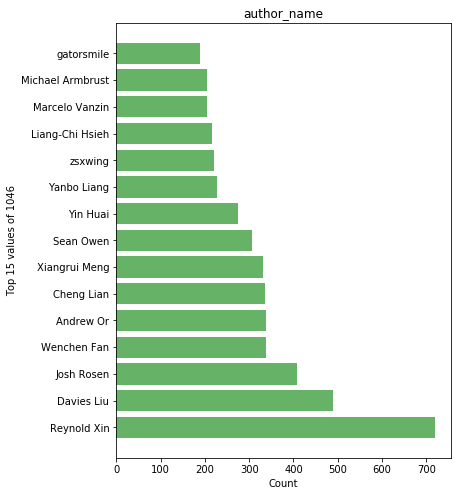

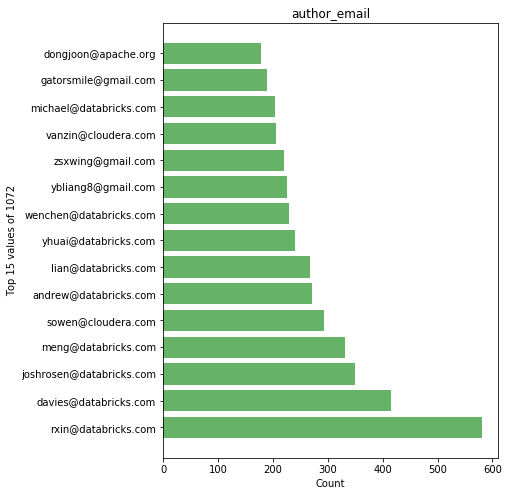

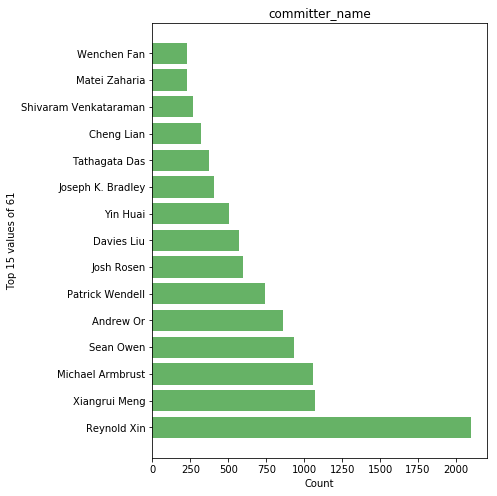

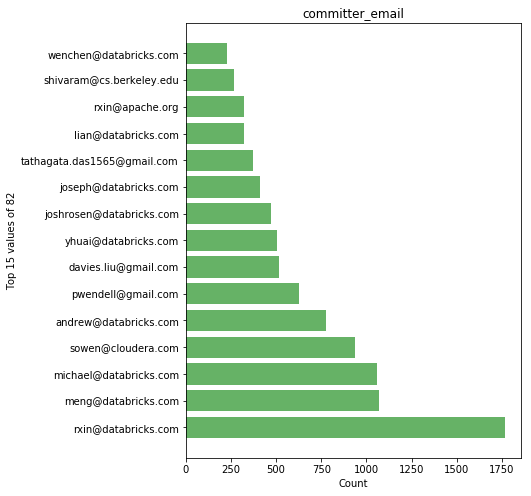

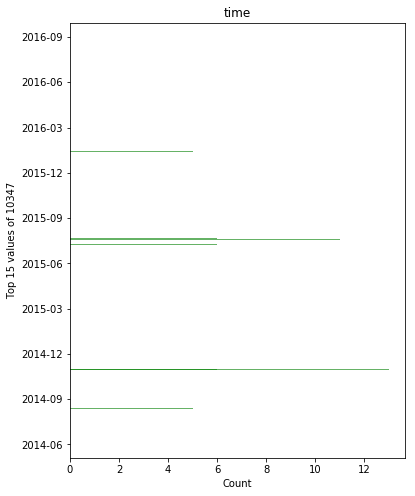

In [43]:
val_count(peak[cat_cols], m_plot=True, name = 'Categorical')

Seems that merging on - key, not good idea, because we got a duplicates in columns jira_id, cid (symmetric to tree_id)

#### Plotting
In this step we will make plot of value count, for each email (author and committer), and save them.

In [44]:
from tqdm import tqdm

In [ ]:
%%capture
for email in tqdm(peak['author_email'].unique()):
    val_count(peak[peak['author_email'] == email], m_plot=True, name = 'by_email', dir_name = email, show = False)

  0%|          | 0/1072 [00:00<?, ?it/s]

In [ ]:
for email in tqdm(peak['committer_email'].unique()):
    val_count(peak[peak['committer_email'] == email], m_plot=True, name = 'by_email_comm', dir_name = email, show = False)

### Encoding text

Without message_encoding column. We will fill them on the next step.

#### Extract addition feature from message_encoding

I had thoughts about feature extracting from first words in message_encoding, to more clever merge on key, but they seems different sometime and got duplicates, dunno why.

In [45]:
import re

In [46]:
for i in range(len(df)):
    test = re.sub(r'[^-\w]',' ', (df['message_encoding'].loc[i].split()[0].split(' ')[0])).split()[0]
    if test != df['key'].loc[i]:
        print (test, df['key'].loc[i], i)
        break

SPARK-17183 SPARK-18101 18


In [47]:
def text_lable_extr(x, ind = 0):
    '''
    Extracting features from the frist word of text.
    '''
    tmp = re.sub(r'[^-\w]',' ', (x.split(' ')[0])).split()
    if len(tmp) > ind:
        return tmp[ind]
    else:
        return np.nan

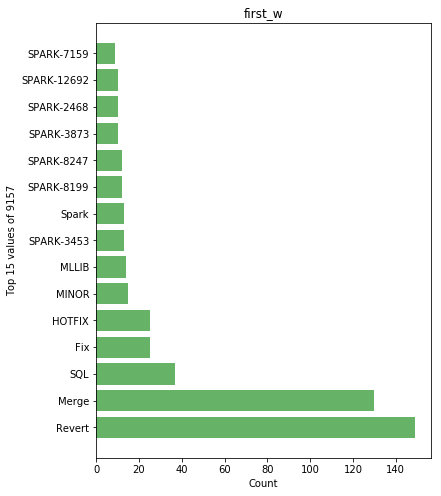

In [48]:
peak['first_w'] = peak['message_encoding'].apply(lambda x: text_lable_extr(x, ind=0))
val_count(peak[['first_w']], m_plot=True)

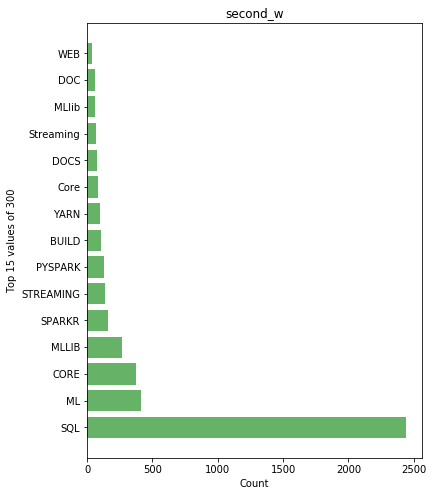

In [49]:
peak['second_w'] = peak['message_encoding'].apply(lambda x: text_lable_extr(x, ind=1))
val_count(peak[['second_w']], m_plot=True)

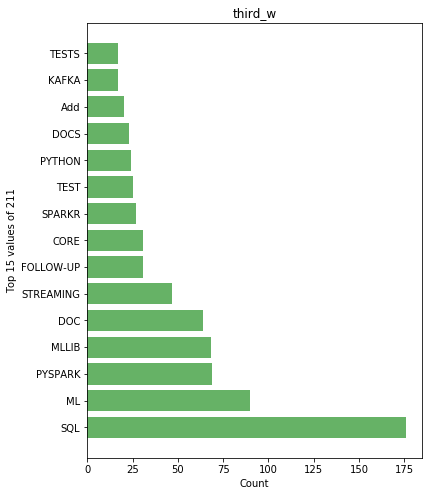

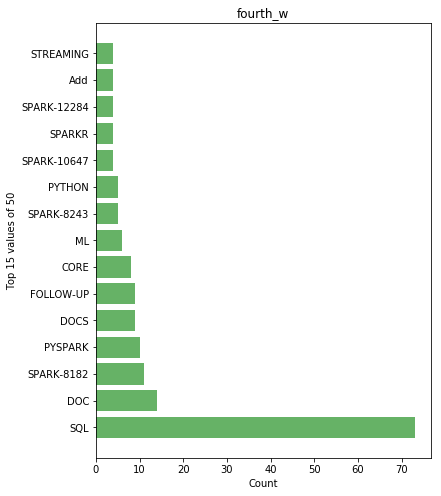

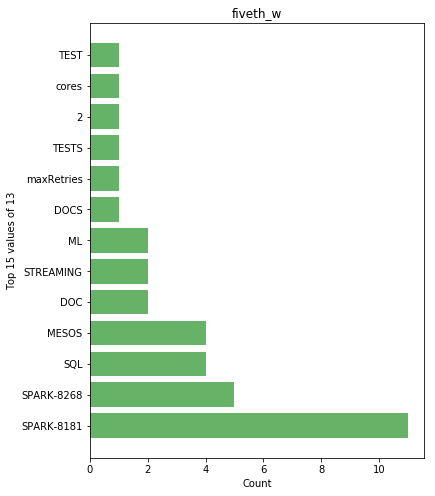

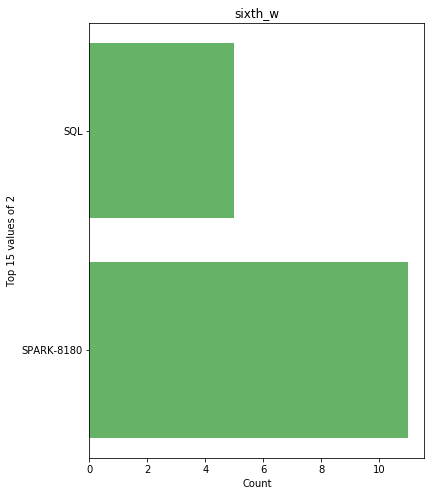

In [50]:
#Just for test
peak['third_w'] = peak['message_encoding'].apply(lambda x: text_lable_extr(x, ind=2))
val_count(peak[['third_w']], m_plot=True)

peak['fourth_w'] = peak['message_encoding'].apply(lambda x: text_lable_extr(x, ind=3))
val_count(peak[['fourth_w']], m_plot=True)

peak['fiveth_w'] = peak['message_encoding'].apply(lambda x: text_lable_extr(x, ind=4))
val_count(peak[['fiveth_w']], m_plot=True)

peak['sixth_w'] = peak['message_encoding'].apply(lambda x: text_lable_extr(x, ind=5))
val_count(peak[['sixth_w']], m_plot=True)

As we can see, after first word there are a lot of nans, not enough information for training.

In [51]:
peak.head().T

,0,1,2,3,4
author_name,gatorsmile,Reynold Xin,Reynold Xin,Eric Liang,Eric Liang
author_email,gatorsmile@gmail.com,rxin@databricks.com,rxin@databricks.com,ekl@databricks.com,ekl@databricks.com
committer_name,Reynold Xin,Reynold Xin,Reynold Xin,Yin Huai,Reynold Xin
committer_email,rxin@databricks.com,rxin@databricks.com,rxin@databricks.com,yhuai@databricks.com,rxin@databricks.com
time,2016-11-07 12:16:37,2016-11-07 09:44:55,2016-11-07 09:42:05,2016-11-05 01:54:28,2016-11-01 22:35:34
time_offset,-480,-480,-480,-420,-420
message_encoding,[SPARK-16904][SQL] Removal of Hive Built-in Ha...,[SPARK-18296][SQL] Use consistent naming for e...,[SPARK-18167][SQL] Disable flaky hive partitio...,[SPARK-18167] Re-enable the non-flaky parts of...,[SPARK-18167] Disable flaky SQLQuerySuite test...
severity,3,3,3,3,3
tm_year,2016,2016,2016,2016,2016
tm_mon,11,11,11,11,11


#### Fast clean

We have tested some ideas, now we clear bad part of them. 

Because this dataset is Timeseries, let's treat it like it and replace index with time.

In [52]:
peak.drop(index=peak[(peak['tm_year'] == 2012) | (peak['tm_year'] == 2013)].index, inplace=True)

In [53]:
peak.index = peak['time']
peak.sort_index(inplace=True, ascending=True)
peak.drop(columns = ['second_w', 'third_w', 'fourth_w', 'fiveth_w', 'sixth_w', 'time_offset', 'time'], inplace=True)

In [54]:
peak['message_encoding'] = peak['message_encoding'].apply(lambda x: ' '.join(x.split(' ')[1:]))

#### Labeling categorical features

Replacing categorical text features with label

Severity will be look like
 - 3 -> 2
 - 0 -> 0
 - 10 -> 4
 - 1 -> 1
 - 5 -> 3

Four class, they look like:

- 3 count = 6324
- 1 count = 2660
- 5 count = 972
- 10 count = 942
- 0 count = 577

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
for col in ['author_name', 'author_email', 'committer_name', 'committer_email', 'first_w', 'severity']:
    peak[col] = LabelEncoder().fit_transform(peak[col].fillna('Empty'))

In [57]:
peak.head()

,author_name,author_email,committer_name,committer_email,message_encoding,severity,tm_year,tm_mon,tm_mday,tm_hour,tm_wday,tm_yday,first_w
time,,,,,,,,,,,,,
2014-01-02 05:03:48,506,718,21,34,pull request #312 from pwendell/log4j-fix-2\n\...,2,2014,1,2,5,3,2,27
2014-01-02 09:29:12,506,718,21,34,pull request #309 from mateiz/conf2\n\nSPARK-5...,0,2014,1,2,9,3,2,27
2014-01-03 00:54:54,419,553,17,23,pull request #311 from tmyklebu/master\n\nSPAR...,2,2014,1,3,0,4,3,27
2014-01-04 11:50:14,506,718,21,34,pull request #329 from pwendell/remove-binarie...,4,2014,1,4,11,5,4,27
2014-01-06 13:08:27,527,703,23,32,Ning upgrade\n,1,2014,1,6,13,0,6,67


### Train_test split

Before text vectorizing, will perform split and then move to another notebook for predict. 

I took a couple of month for test.

In [58]:
train_mask = (peak.index < pd.to_datetime('2016-8-01'))

#### Compare and look deeper

In [59]:
val_count(peak[train_mask])

552     656
159     469
327     352
49      339
115     332
715     330
704     293
735     269
587     268
1018    221
434     201
727     200
381     198
405     194
325     168
Name: author_name, dtype: int64
Column val_count author_name shape: (957,)
770     539
208     395
575     330
438     314
76      271
491     263
832     254
1010    235
1047    221
582     201
1006    198
931     194
970     184
877     162
237     155
Name: author_email, dtype: int64
Column val_count author_email shape: (976,)
25    1931
35    1070
18    1048
1      851
27     756
21     719
13     537
6      534
37     460
12     393
30     363
3      316
28     252
16     177
17     156
Name: committer_name, dtype: int64
Column val_count committer_name shape: (39,)
37    1619
24    1070
25    1048
2      777
43     755
34     601
5      477
54     460
20     431
18     393
45     362
22     316
36     312
40     251
51     177
Name: committer_email, dtype: int64
Column val_count committer_email shape: (5

In [60]:
val_count(peak[~train_mask])

704    46
552    42
835    40
587    39
815    39
327    35
194    31
727    28
602    28
255    24
913    24
178    23
942    21
159    20
588    18
Name: author_name, dtype: int64
Column val_count author_name shape: (182,)
970     46
770     42
327     40
297     39
832     39
438     35
254     30
816     28
1006    28
682     24
360     24
237     23
801     21
208     20
797     18
Name: author_email, dtype: int64
Column val_count author_email shape: (184,)
27    180
25    147
34    102
8      79
29     49
36     45
37     43
13     42
6      38
16     37
7      31
5      20
28     17
12     16
18     13
Name: committer_name, dtype: int64
Column val_count committer_name shape: (26,)
43    180
37    147
52    102
13     79
42     49
53     45
54     43
20     42
5      38
51     37
10     31
7      17
40     17
18     16
25     13
Name: committer_email, dtype: int64
Column val_count committer_email shape: (29,)
2    522
1    278
0     64
4     30
3     28
Name: severity, dtype: int

In [61]:
peak[train_mask].to_csv('data/train.csv')

peak[~train_mask].to_csv('data/test.csv')